This notebook is to collect all the pickle files which contain the necessary variables to plot. It will plot 6 figures for loss landscape, gradient and beta-effectiveness on two batch sizes seperately.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('seaborn')
import numpy as np
import pickle
import os
import torch

In [54]:
batch_size = 4  # 128, change the batch size to run on a different batch size
lr_1 = 0.0001
lr_2 = 0.0005
lr_3 = 0.00002

In [56]:
root = ''

with open(root+'gn_'+str(lr_1)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    gn_1 = pickle.load(f)
    loss_gn_1, grad_gn_1 = gn_1[0], gn_1[1]

with open(root+'bn_'+str(lr_1)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    bn_1 = pickle.load(f)
    loss_bn_1, grad_bn_1 = bn_1[0], bn_1[1]
    
with open(root+'std_'+str(lr_1)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    std_1 = pickle.load(f)
    loss_std_1, grad_std_1 = std_1[0], std_1[1]
    
    
with open(root+'gn_'+str(lr_2)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    gn_2 = pickle.load(f)
    loss_gn_2, grad_gn_2 = gn_2[0], gn_2[1]

with open(root+'bn_'+str(lr_2)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    bn_2 = pickle.load(f)
    loss_bn_2, grad_bn_2 = bn_2[0], bn_2[1]
    
with open(root+'std_'+str(lr_2)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    std_2 = pickle.load(f)
    loss_std_2, grad_std_2 = std_2[0], std_2[1]
    
    
with open(root+'gn_'+str(lr_3)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    gn_3 = pickle.load(f)
    loss_gn_3, grad_gn_3 = gn_3[0], gn_3[1]

with open(root+'bn_'+str(lr_3)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    bn_3 = pickle.load(f)
    loss_bn_3, grad_bn_3 = bn_3[0], bn_3[1]
    
with open(root+'std_'+str(lr_3)+'_'+str(batch_size)+'.pickle', 'rb') as f:
    std_3 = pickle.load(f)
    loss_std_3, grad_std_3 = std_3[0], std_3[1]

In [59]:
loss_gn_curve_min = []
loss_gn_curve_max = []
for i in range(len(loss_gn_1)):
    loss_gn_curve_min.append(np.min([loss_gn_1[i], loss_gn_2[i], loss_gn_3[i]]))
    loss_gn_curve_max.append(np.max([loss_gn_1[i], loss_gn_2[i], loss_gn_3[i]]))

loss_bn_curve_min = []
loss_bn_curve_max = []
for i in range(len(loss_bn_1)):
    loss_bn_curve_min.append(np.min([loss_bn_1[i], loss_bn_2[i], loss_bn_3[i]]))
    loss_bn_curve_max.append(np.max([loss_bn_1[i], loss_bn_2[i], loss_bn_3[i]]))
    
loss_std_curve_min = []
loss_std_curve_max = []
for i in range(len(loss_std_1)):
    loss_std_curve_min.append(np.min([loss_std_1[i], loss_std_2[i], loss_std_3[i]]))
    loss_std_curve_max.append(np.max([loss_std_1[i], loss_std_2[i], loss_std_3[i]]))

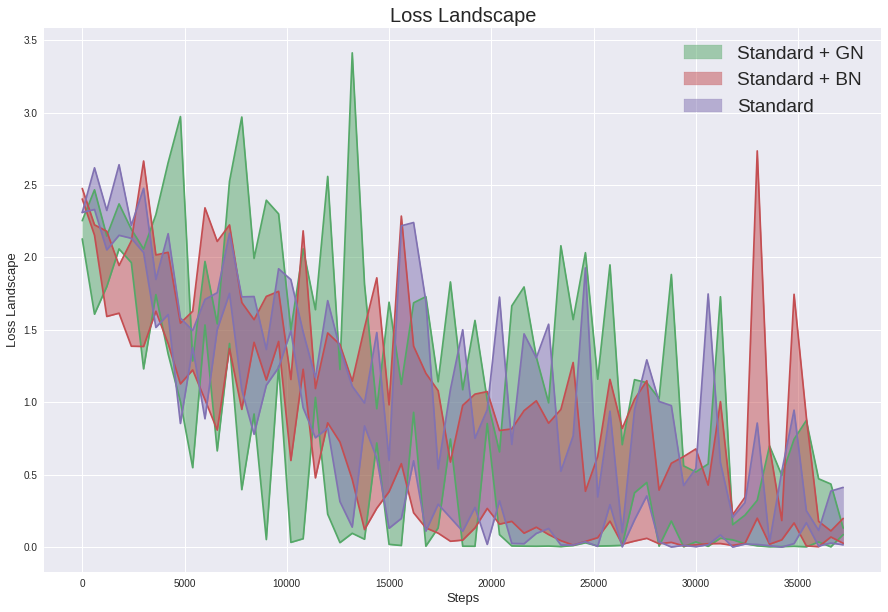

In [60]:
step = 600
steps = np.arange(0, len(loss_gn_curve_min), step)
plt.figure(figsize=(15, 10))
plt.fill_between(steps, loss_gn_curve_min[::step], loss_gn_curve_max[::step],
                alpha=0.5, color='C1', label='Standard + GN')
plt.plot(steps, loss_gn_curve_min[::step], color='C1')
plt.plot(steps, loss_gn_curve_max[::step], color='C1')

plt.fill_between(steps, loss_bn_curve_min[::step], loss_bn_curve_max[::step],
                alpha=0.5, color='C2', label='Standard + BN')
plt.plot(steps, loss_bn_curve_min[::step], color='C2')
plt.plot(steps, loss_bn_curve_max[::step], color='C2')

plt.fill_between(steps, loss_std_curve_min[::step], loss_std_curve_max[::step],
                alpha=0.5, color='C3', label='Standard')
plt.plot(steps, loss_std_curve_min[::step], color='C3')
plt.plot(steps, loss_std_curve_max[::step], color='C3')

plt.legend(fontsize=19)
plt.title('Loss Landscape', fontsize=20)
plt.ylabel('Loss Landscape', fontsize=13)
plt.xlabel('Steps', fontsize=13)
plt.savefig(os.path.join('figs', 'batch_'+str(batch_size)+'_loss_landscape.png'), dpi=500, quality=100)
plt.show()

In [61]:
pred_gn_1 = []
pred_gn_2 = []
pred_gn_3 = []
for i in range(1,len(grad_gn_1)):
    pred_gn_1.append((grad_gn_1[i-1] - grad_gn_1[i]).norm(p=2).item())
    pred_gn_2.append((grad_gn_2[i-1] - grad_gn_2[i]).norm(p=2).item())
    pred_gn_3.append((grad_gn_3[i-1] - grad_gn_3[i]).norm(p=2).item())

pred_bn_1 = []
pred_bn_2 = []
pred_bn_3 = []
for i in range(1,len(grad_bn_1)):
    pred_bn_1.append((grad_bn_1[i-1] - grad_bn_1[i]).norm(p=2).item())
    pred_bn_2.append((grad_bn_2[i-1] - grad_bn_2[i]).norm(p=2).item())
    pred_bn_3.append((grad_bn_3[i-1] - grad_bn_3[i]).norm(p=2).item())
               
pred_std_1 = []
pred_std_2 = []
pred_std_3 = []
for i in range(1,len(grad_std_1)):
    pred_std_1.append((grad_std_1[i-1] - grad_std_1[i]).norm(p=2).item())
    pred_std_2.append((grad_std_2[i-1] - grad_std_2[i]).norm(p=2).item())
    pred_std_3.append((grad_std_3[i-1] - grad_std_3[i]).norm(p=2).item())

pred_gn_curve_min = []
pred_gn_curve_max = []
for i in range(len(pred_gn_1)):
    pred_gn_curve_min.append(np.min([pred_gn_1[i], pred_gn_2[i], pred_gn_3[i]]))
    pred_gn_curve_max.append(np.max([pred_gn_1[i], pred_gn_2[i], pred_gn_3[i]]))
               
pred_bn_curve_min = []
pred_bn_curve_max = []
for i in range(len(pred_bn_1)):
    pred_bn_curve_min.append(np.min([pred_bn_1[i], pred_bn_2[i], pred_bn_3[i]]))
    pred_bn_curve_max.append(np.max([pred_bn_1[i], pred_bn_2[i], pred_bn_3[i]]))
               
pred_std_curve_min = []
pred_std_curve_max = []
for i in range(len(pred_bn_1)):
    pred_std_curve_min.append(np.min([pred_std_1[i], pred_std_2[i], pred_std_3[i]]))
    pred_std_curve_max.append(np.max([pred_std_1[i], pred_std_2[i], pred_std_3[i]]))

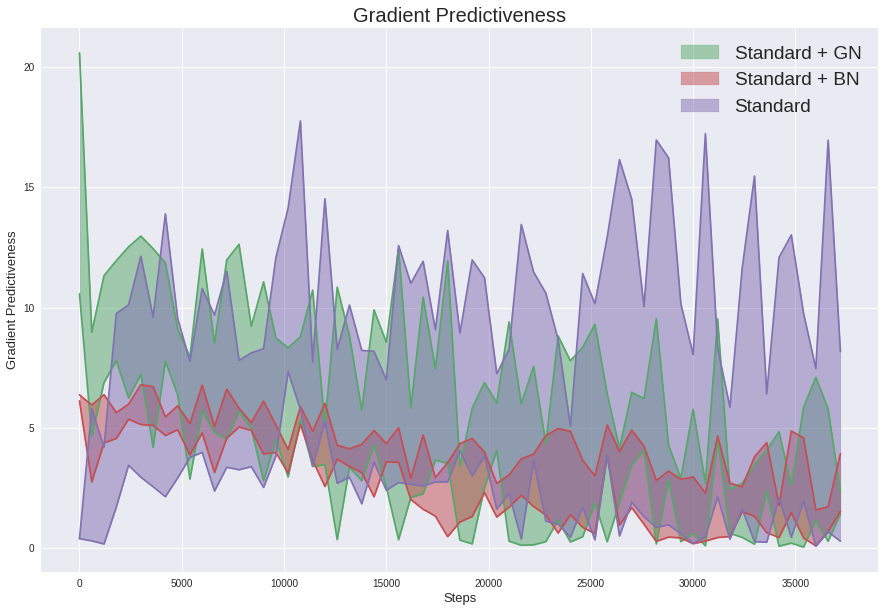

In [62]:
step = 600
steps = np.arange(0, len(pred_gn_curve_min), step)
plt.figure(figsize=(15, 10))
plt.fill_between(steps, pred_gn_curve_min[::step], pred_gn_curve_max[::step],
                alpha=0.5, color='C1', label='Standard + GN')
plt.plot(steps, pred_gn_curve_min[::step], color='C1')
plt.plot(steps, pred_gn_curve_max[::step], color='C1')

plt.fill_between(steps, pred_bn_curve_min[::step], pred_bn_curve_max[::step],
                alpha=0.5, color='C2', label='Standard + BN')
plt.plot(steps, pred_bn_curve_min[::step], color='C2')
plt.plot(steps, pred_bn_curve_max[::step], color='C2')

plt.fill_between(steps, pred_std_curve_min[::step], pred_std_curve_max[::step],
                alpha=0.5, color='C3', label='Standard')
plt.plot(steps, pred_std_curve_min[::step], color='C3')
plt.plot(steps, pred_std_curve_max[::step], color='C3')

plt.legend(fontsize=19)
plt.title('Gradient Predictiveness', fontsize=20)
plt.ylabel('Gradient Predictiveness', fontsize=13)
plt.xlabel('Steps', fontsize=13)
plt.savefig(os.path.join('figs', 'batch_'+str(batch_size)+'_gradient.png'), dpi=500, quality=100)
plt.show()

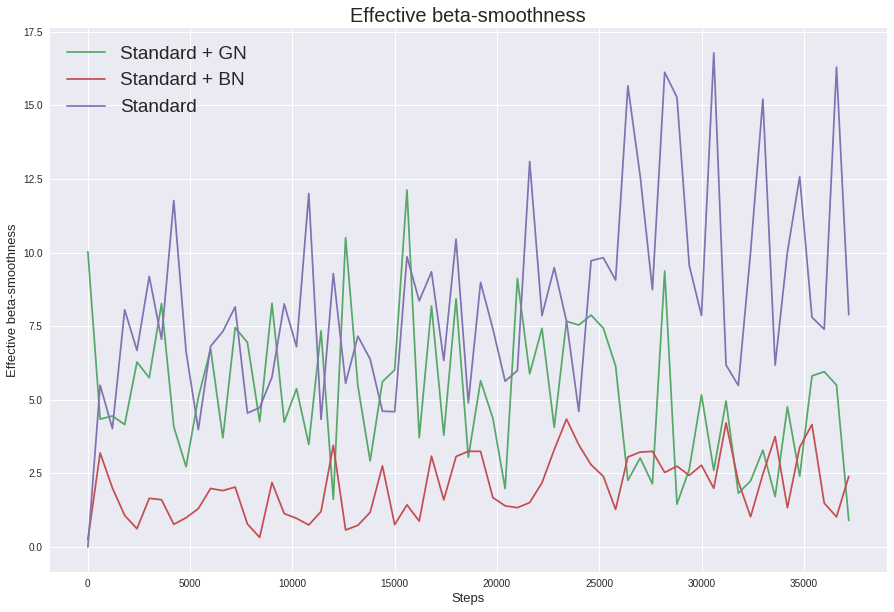

In [63]:
step = 600
steps = np.arange(0, len(pred_gn_curve_min), step)
plt.figure(figsize=(15, 10))

plt.plot(steps, np.array(pred_gn_curve_max[::step])-np.array(pred_gn_curve_min[::step]), color='C1', label='Standard + GN')
plt.plot(steps, np.array(pred_bn_curve_max[::step])-np.array(pred_bn_curve_min[::step]), color='C2', label='Standard + BN')
plt.plot(steps, np.array(pred_std_curve_max[::step])-np.array(pred_std_curve_min[::step]), color='C3', label='Standard')

plt.legend(fontsize=19)
plt.title('Effective beta-smoothness', fontsize=20)
plt.ylabel('Effective beta-smoothness', fontsize=13)
plt.xlabel('Steps', fontsize=13)
plt.savefig(os.path.join('figs', 'batch_'+str(batch_size)+'_effective_beta_smoothness.png'), dpi=500, quality=100)
plt.show()